In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt25 = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."
llm_var = "gpt-4-turbo-2024-04-09"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools,ckpt_dir='ckpt_301')
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-29
time: 15:52:37
LLM:  gpt-4-turbo-2024-04-09 
Temperature:  0.1


In [3]:
agent.run(prompt25)

Thought: To simulate the protein with PDB ID 1L6X at different pH conditions and analyze its Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF), I need to first set up and run the molecular dynamics simulations for both pH conditions. After obtaining the trajectory files from these simulations, I can then proceed to analyze SASA and RMSF.

Action:
```json
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1L6X",
        "forcefield_files": ["amber99sb-ildn"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "constraintTolerance": 0.00001,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "298 * kelvin",  // Approximate for pH 7.0
            "Friction": "1.0 / picosecond

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-29
time: 15:52:50
Files found in registry: 1L6X_185934: PDB file downloaded from RSCB
 PDBFile ID: 1L6X_185934
 1L6X_185938: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 5.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_185941: Initial positions for simulation sim0_185941
 sim0_185941: Basic Simulation of Protein 1L6X_185938
 rec0_185946: Simulation trajectory for protein 1L6X_185938 and simulation sim0_185941
 rec1_185946: Simulation state log for protein 1L6X_185938 and simulation sim0_185941
 rec2_185946: Simulation pdb frames for protein 1L6X_185938 and simulation sim0_185941
 1L6X_190811: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 8.8. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_190814: Initial positions for simulation sim0_190814
 sim0_190814: Basic Simulation of Protein 1L6X_190811
 rec0_

In [5]:
path_oxygenated = registry.get_mapped_path("fig0_194109")
path_deoxygenated = registry.get_mapped_path("fig0_194112")
assert os.path.exists(path_oxygenated), 'Path not found'
assert os.path.exists(path_deoxygenated), 'Path not found'
assert path_oxygenated != path_deoxygenated, 'Paths are the same'

In [6]:
from IPython.display import Image
path_1 = registry.get_mapped_path("fig0_120126")
path_2 = registry.get_mapped_path("fig0_120130")
path1 = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_25'+path_1.split("ckpt/ckpt_25")[1]+".png"
path2 = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_25'+path_2.split("ckpt/ckpt_25")[1]+".png"

IndexError: list index out of range

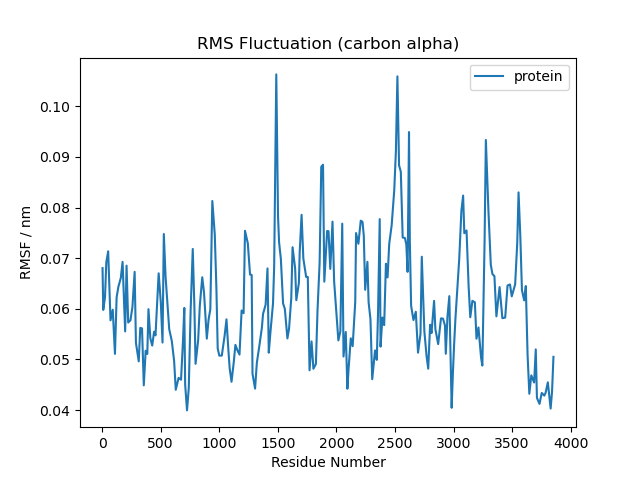

In [6]:
from IPython.display import Image
Image(filename=path_oxygenated)

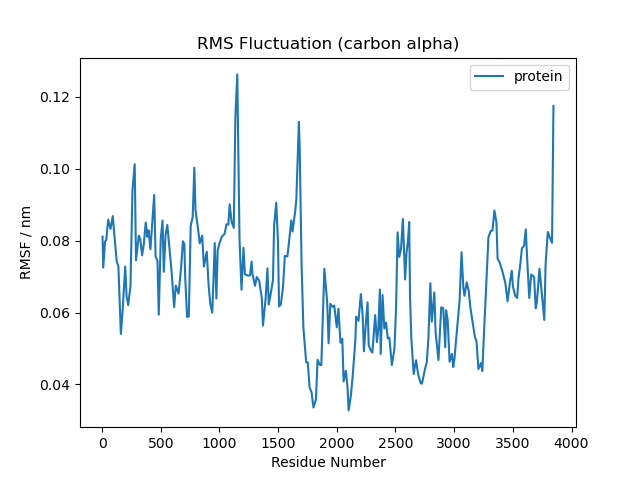

In [7]:
Image(filename=path_deoxygenated)

In [28]:
path_oxygenated = registry.get_mapped_path("fig0_194106")
path_deoxygenated = registry.get_mapped_path("fig0_192757")
assert os.path.exists(path_oxygenated), 'Path not found'
assert os.path.exists(path_deoxygenated), 'Path not found'
assert path_oxygenated != path_deoxygenated, 'Paths are the same'

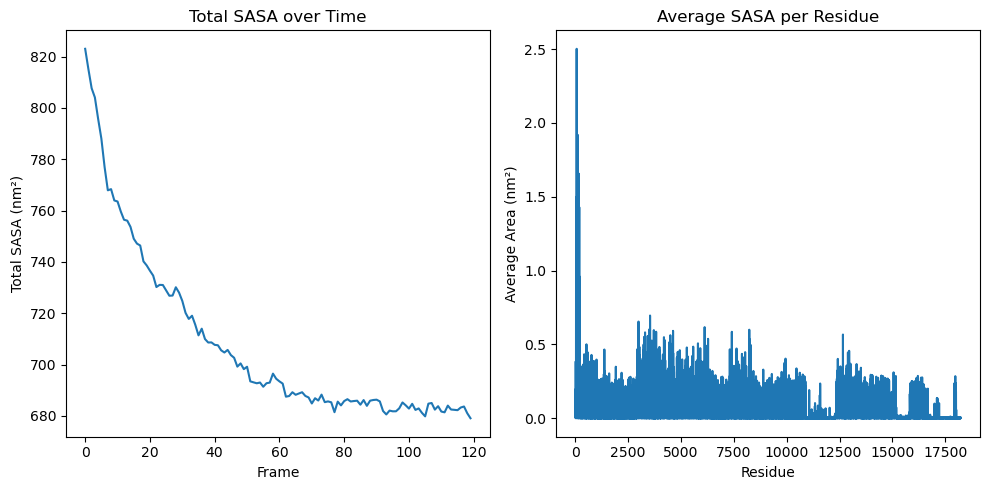

In [29]:
Image(filename=path_oxygenated)

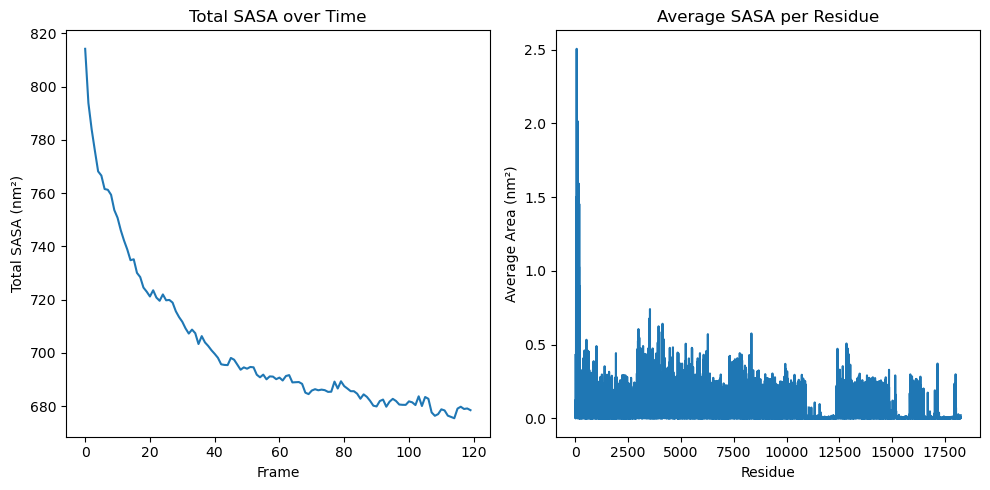

In [30]:
Image(filename=path_deoxygenated)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### No hallucination ✅
### Logic make sense ✅
### Correct Answer  ✅
### Number of steps completed: 9
### % steps completed: 100%